In [ ]:
from src.model import HangmanTransformer
from src.dataset import HangmanDataset

In [12]:
from torch.utils.data import DataLoader
import random
from tqdm import tqdm

# Set the seed for reproducibility
SEED = 42
random.seed(SEED)
max_guesses = 26

# Read and clean words
with open('words_250000_train.txt', 'r') as file:
    training_words = [line.strip().lower() for line in file if line.strip().isalpha()]

# Group words by their lengths
word_dict_by_len = {}
for word in tqdm(training_words):
    l = len(word)
    word_dict_by_len.setdefault(l, []).append(word)

# Split each group into 70-30 and collect
train_words, test_words = [], []

for length, words in word_dict_by_len.items():
    random.shuffle(words)
    split_idx = int(0.7 * len(words))
    train_words.extend(words[:split_idx])
    test_words.extend(words[split_idx:])

print(f"Total training words: {len(train_words)}")
print(f"Total test words: {len(test_words)}")


dataset = HangmanDataset(train_words, max_word_length=35, max_guesses=max_guesses)
dataloader = DataLoader(
        dataset,
        batch_size=32,
        shuffle=True,
        num_workers=4,
        pin_memory=True, # good for GPU training
    )

100%|██████████████████████████████████████████████████████████████████████| 227300/227300 [00:00<00:00, 2001657.19it/s]


Total training words: 159096
Total test words: 68204
creating dataset


100%|████████████████████████████████████████████████████████████████████████| 159096/159096 [00:07<00:00, 21314.67it/s]


In [28]:
import torch.nn as nn

loadModel= True
checkpoint_file = 'checkpoint.14th'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epoch_start = 0
print(device)

model = HangmanTransformer(vocab_size=29)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    model = nn.DataParallel(model)

model = model.to(device)

if (loadModel):
    checkpoint = torch.load(checkpoint_file)
    # print(checkpoint['model_state_dict'])
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch_start = checkpoint['epoch']
    print('loaded' )

# LOSS FUNCTIONS
BCELoss = nn.BCEWithLogitsLoss(reduction='none')

cuda
loaded


 91%|██▋| 4518/4972 [1:04:20<03:24,  2.22it/s, wrongGuess=7.84, avg=7, trial=15.2, BCE=4.26, duplLoss=0.133, totLoss=14]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███████| 4972/4972 [36:09<00:00,  2.29it/s, wrongGuess=5.71, avg=7, trial=13, BCE=3.48, duplLoss=0.017, totLoss=13]


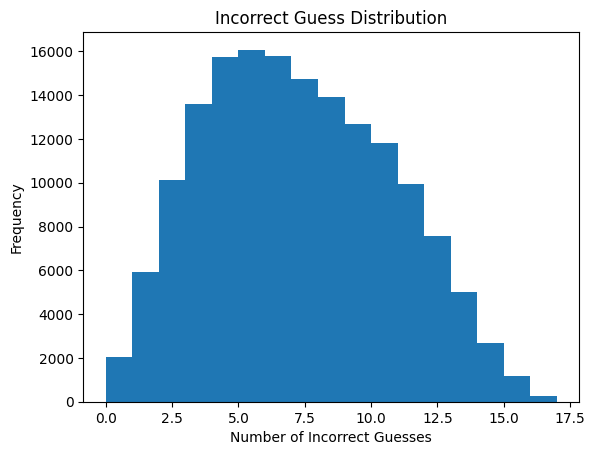

  2%|    | 97/4972 [00:42<34:21,  2.36it/s, wrongGuess=5.47, avg=6, trial=13.1, BCE=3.51, duplLoss=0.0364, totLoss=13.2]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██| 4972/4972 [36:06<00:00,  2.30it/s, wrongGuess=6.67, avg=6, trial=13.7, BCE=3.76, duplLoss=0.0451, totLoss=13.4]


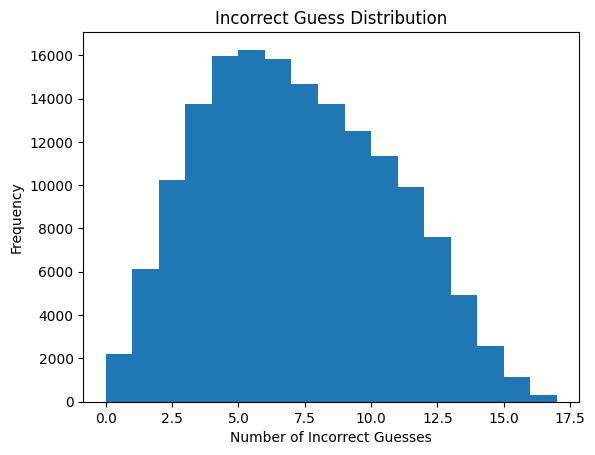

 29%|▌ | 1457/4972 [10:28<25:20,  2.31it/s, wrongGuess=6.75, avg=6, trial=13.9, BCE=3.88, duplLoss=0.0285, totLoss=13.8]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 58%|█▏| 2866/4972 [20:43<15:25,  2.27it/s, wrongGuess=5.72, avg=6, trial=12.8, BCE=3.66, duplLoss=0.0924, totLoss=13.6]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 86%|████▎| 4299/4972 [31:10<05:43,  1.96it/s, wrongGuess=6.97, avg=6, trial=14.1, BCE=4, duplLoss=0.0293, tot

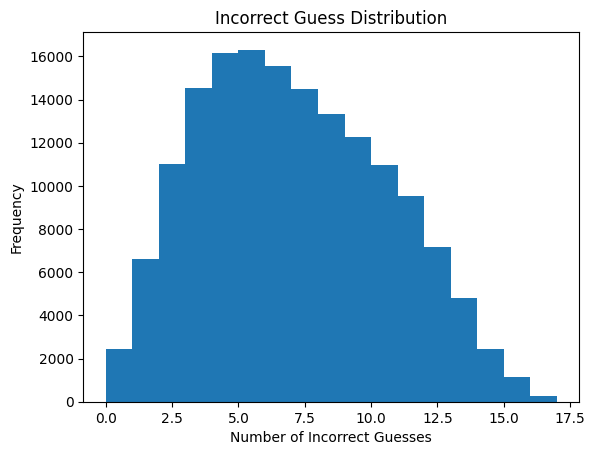

 15%|▌   | 745/4972 [05:21<30:19,  2.32it/s, wrongGuess=6.72, avg=6, trial=14.1, BCE=3.72, duplLoss=0.216, totLoss=13.5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 33%|▋ | 1636/4972 [11:48<24:00,  2.32it/s, wrongGuess=7.03, avg=6, trial=14.2, BCE=3.78, duplLoss=0.0259, totLoss=13.4]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██| 4972/4972 [36:13<00:00,  2.29it/s, wrongGuess=5.92, avg=6, trial=13.3, BCE=3.65, duplLoss=0.0204, tot

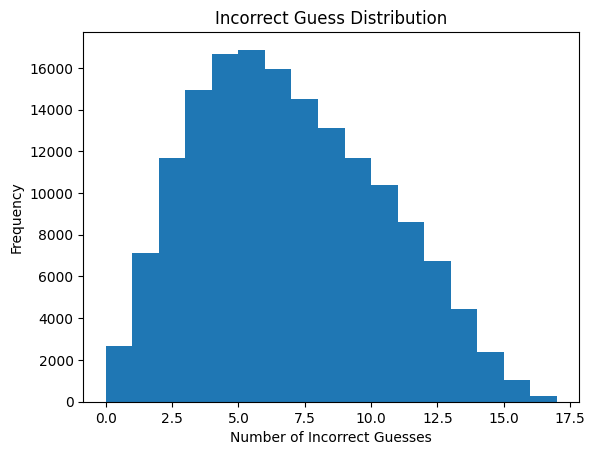

100%|█████| 4972/4972 [56:31<00:00,  1.47it/s, wrongGuess=5.58, avg=6, trial=12.4, BCE=3.47, duplLoss=0.012, totLoss=13]


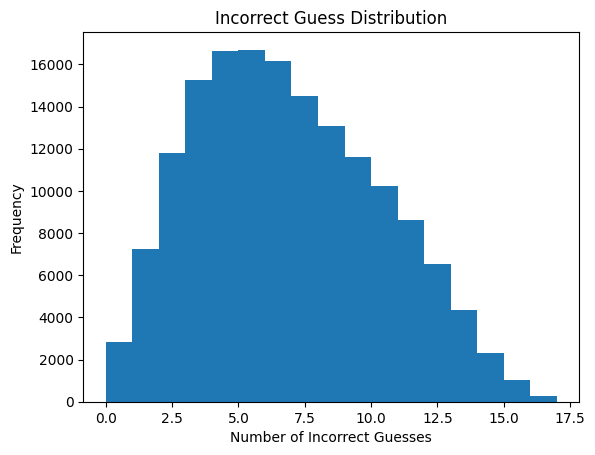

100%|████| 4972/4972 [57:26<00:00,  1.44it/s, wrongGuess=7.79, avg=6, trial=14.8, BCE=4.42, duplLoss=0.0178, totLoss=15]


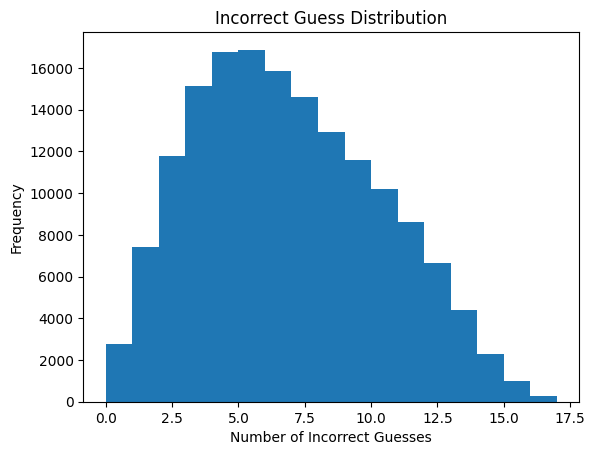

100%|███| 4972/4972 [56:36<00:00,  1.46it/s, wrongGuess=6.46, avg=6, trial=13.2, BCE=3.88, duplLoss=0.019, totLoss=13.9]


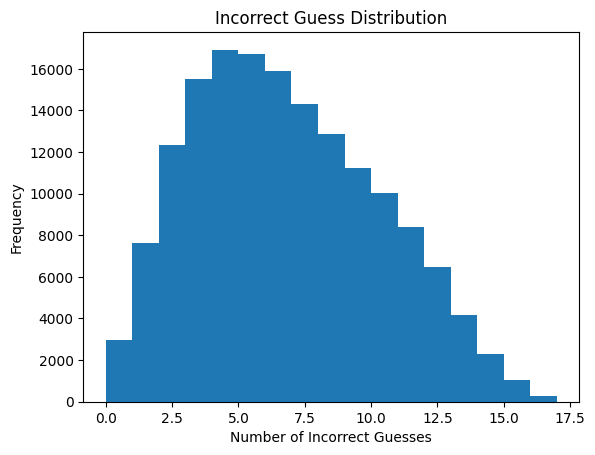

 73%|█▍| 3622/4972 [47:55<09:41,  2.32it/s, wrongGuess=7.75, avg=6, trial=14.5, BCE=4.19, duplLoss=0.0205, totLoss=14.4]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███| 4972/4972 [36:03<00:00,  2.30it/s, wrongGuess=5.5, avg=6, trial=13.3, BCE=4.03, duplLoss=0.0116, totLoss=14.9]


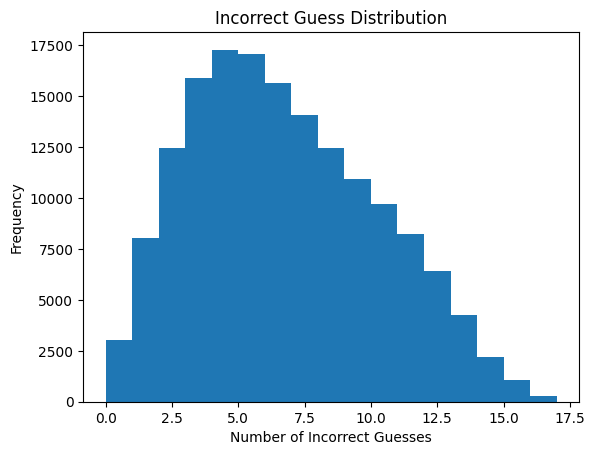

  3%|   | 159/4972 [01:09<33:55,  2.36it/s, wrongGuess=6.31, avg=6, trial=13.6, BCE=3.71, duplLoss=0.0193, totLoss=13.6]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 32%|▎| 1597/4972 [11:26<23:57,  2.35it/s, wrongGuess=5.09, avg=6, trial=12.2, BCE=3.33, duplLoss=0.00717, totLoss=13.2]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 66%|█▎| 3291/4972 [23:42<12:12,  2.29it/s, wrongGuess=5.97, avg=6, trial=12.8, BCE=3.42, duplLoss=0.0117, tot

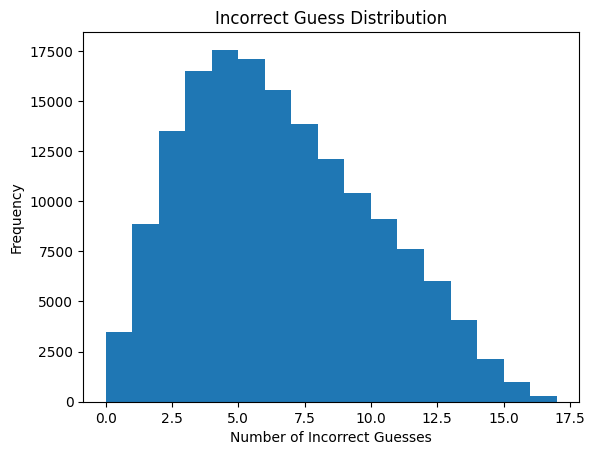

100%|██| 4972/4972 [36:10<00:00,  2.29it/s, wrongGuess=5.83, avg=6, trial=13.3, BCE=3.44, duplLoss=0.0179, totLoss=13.1]


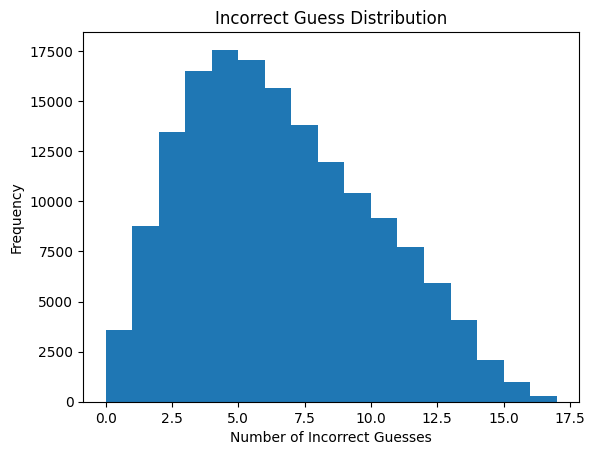

100%|██████| 4972/4972 [35:59<00:00,  2.30it/s, wrongGuess=7, avg=6, trial=13.4, BCE=3.86, duplLoss=0.009, totLoss=14.1]


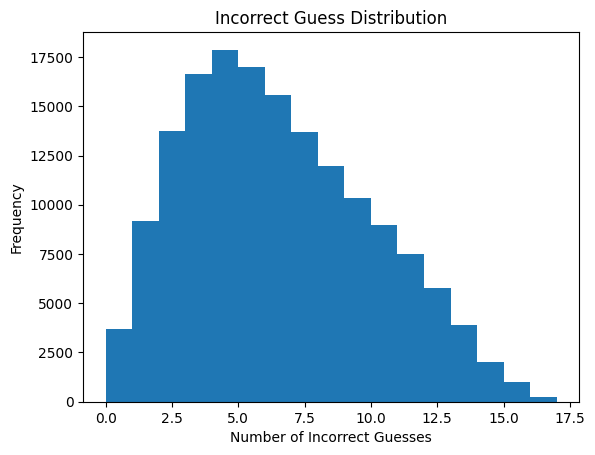

  4%|▏   | 180/4972 [01:17<33:46,  2.36it/s, wrongGuess=7.75, avg=5, trial=14.1, BCE=4.02, duplLoss=0.294, totLoss=13.5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 38%|█▏ | 1879/4972 [13:28<22:08,  2.33it/s, wrongGuess=7.12, avg=6, trial=13.6, BCE=3.76, duplLoss=0.018, totLoss=13.6]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 67%|██ | 3318/4972 [23:50<12:04,  2.28it/s, wrongGuess=6.84, avg=6, trial=13.8, BCE=3.8, duplLoss=0.0153, tot

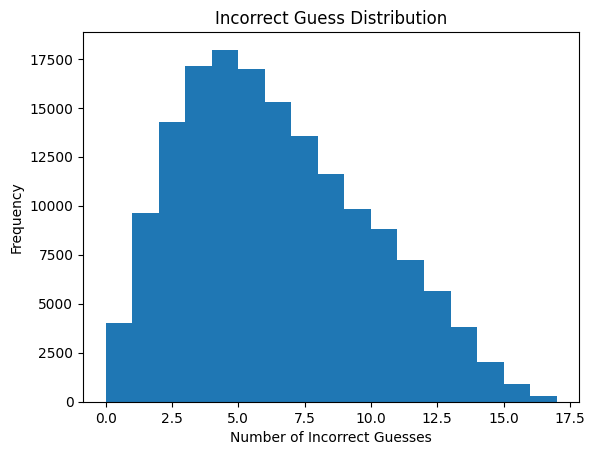

  1%|      | 25/4972 [00:11<35:21,  2.33it/s, wrongGuess=6.09, avg=5, trial=13, BCE=3.53, duplLoss=0.0133, totLoss=13.2]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███| 4972/4972 [35:56<00:00,  2.31it/s, wrongGuess=5.42, avg=5, trial=13, BCE=3.79, duplLoss=0.00811, totLoss=14.3]


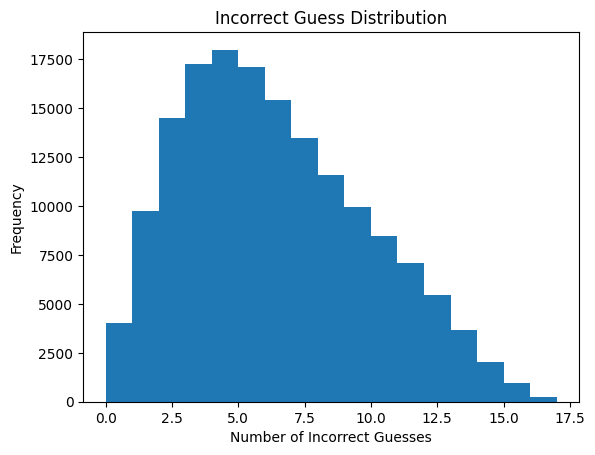

 29%|▎| 1454/4972 [10:24<24:45,  2.37it/s, wrongGuess=5.28, avg=5, trial=12.7, BCE=3.54, duplLoss=0.00768, totLoss=13.6]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 62%|███▋  | 3104/4972 [22:18<13:40,  2.28it/s, wrongGuess=6, avg=5, trial=12.9, BCE=3.49, duplLoss=0.014, totLoss=13.2]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██| 4972/4972 [35:59<00:00,  2.30it/s, wrongGuess=6.17, avg=5, trial=13.6, BCE=3.82, duplLoss=0.0172, tot

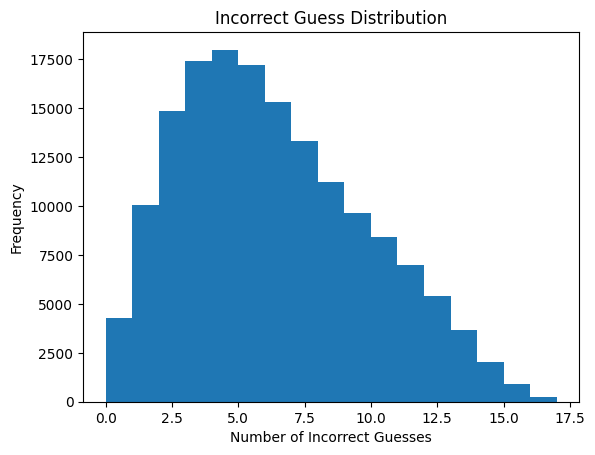

100%|██| 4972/4972 [57:23<00:00,  1.44it/s, wrongGuess=5.96, avg=5, trial=13.2, BCE=3.68, duplLoss=0.0101, totLoss=13.9]


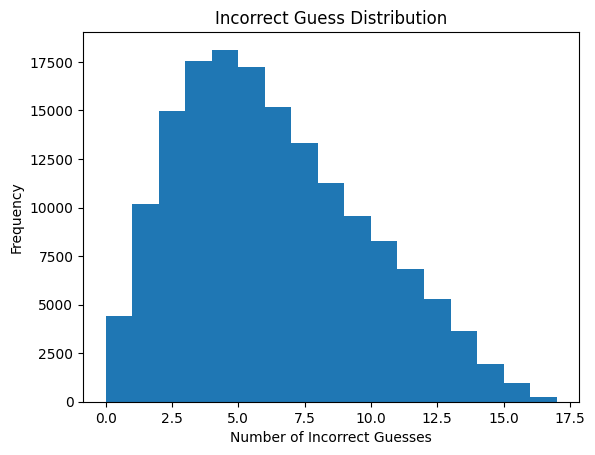

 15%|▍  | 738/4972 [05:16<30:00,  2.35it/s, wrongGuess=5.62, avg=5, trial=13.2, BCE=3.82, duplLoss=0.0116, totLoss=14.3]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 45%|██▎  | 2250/4972 [16:06<19:19,  2.35it/s, wrongGuess=5.91, avg=5, trial=13, BCE=3.6, duplLoss=0.0138, totLoss=13.5]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|███| 4972/4972 [51:44<00:00,  1.60it/s, wrongGuess=5.71, avg=5, trial=12.5, BCE=3.3, duplLoss=0.0118, tot

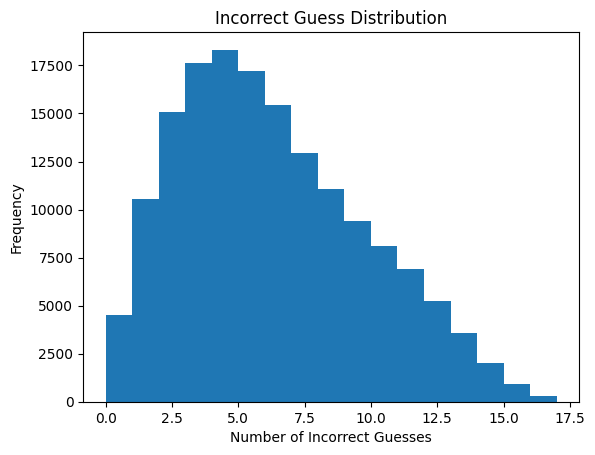

 37%|▎| 1817/4972 [18:11<22:29,  2.34it/s, wrongGuess=5.91, avg=5, trial=13.5, BCE=3.6, duplLoss=0.0115, totLoIOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 58%|▌| 2864/4972 [20:31<15:00,  2.34it/s, wrongGuess=6.09, avg=5, trial=13.5, BCE=3.79, duplLoss=0.0146, totLIOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 88%|▉| 4392/4972 [31:47<04:15,  2.27it/s, wrongGuess=5.59, avg=5, trial=13.2, BCE=3.66, duplLoss=0.0109, totLIOPub message rate e

In [29]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch

# torch.autograd.set_detect_anomaly(True)

epochs = 50
model.train()
for epoch in range(epoch_start+1,epochs,1):
    batch_no = 0
    incorrectGuessesList=[]
    with tqdm(dataloader) as pbar:
        for batch, wordNotYetGuessed, incorrectGuesses, trials in pbar:
            batch_no+=1
            batch['padded_encoder_input'] = batch['padded_encoder_input'].to(device)
            batch['encoder_input_mask'] = batch['encoder_input_mask'].to(device)
            batch['padded_guess_history'] = batch['padded_guess_history'].to(device)
            batch['guess_history_mask'] = batch['guess_history_mask'].to(device)
            batch['target_oneHot'] = batch['target_oneHot'].to(device)
            wordNotYetGuessed = wordNotYetGuessed.to(device)
            incorrectGuesses = incorrectGuesses.to(device)
            trials = trials.to(device)
        
            total_combined_loss = 0
            total_BCE_loss = 0
            total_duplicate_loss = 0
            optimizer.zero_grad()
            prev_distributions = []
            λ = 1000
            
            initial_weight = 8.0 # Weight for guess_number 0
            decay_factor = 0.8   # Multiplied by weight each step (0 < decay_factor < 1)
            
            for guess_number in range(dataset.max_guesses):
                decoder_out = model(batch['padded_encoder_input'], batch['padded_guess_history'], batch['encoder_input_mask'], batch['guess_history_mask'])
                preds = decoder_out[:, guess_number, :]

                # Computing duplicate loss
                pred_probs = torch.softmax(preds, dim=-1)
                # Get indices of previously guessed characters
                guessed_indices = batch['padded_guess_history'][:, :guess_number + 1]  # shape: [batch, guess_number + 1]
                mask = ~batch['guess_history_mask'][:, :guess_number + 1]  # valid guesses (False = valid)
                
                vocab_size = pred_probs.shape[1]
                one_hot_guesses = torch.zeros_like(pred_probs)
                for i in range(guessed_indices.size(0)):  # batch size
                    valid_guesses = guessed_indices[i][mask[i]]
                    valid_guesses = valid_guesses[(valid_guesses >= 0) & (valid_guesses < vocab_size)]  # filter safe indices
                    one_hot_guesses[i].scatter_(0, valid_guesses, 1)

                
                current_step_weight = initial_weight * (decay_factor ** guess_number)
                # Duplicate loss: penalize probability mass on already guessed characters
                duplicate_loss = (pred_probs * one_hot_guesses).sum(dim=1)  # shape: [batch]
                total_duplicate_loss += duplicate_loss
                
                #saving the current probability distribution so that it can be used later
                prev_distributions.append(pred_probs.detach())

                # Computing BCE Loss against ground Truth
                BCE_loss = BCELoss(preds, batch['target_oneHot']).mean(axis=1)
                total_BCE_loss += BCE_loss * wordNotYetGuessed[:, 0]
                
                # Computing total loss
#                 combined_loss = BCE_loss + (λ * duplicate_loss)
#                 combined_loss = combined_loss * current_step_weight
#                 combined_loss = combined_loss * wordNotYetGuessed[:, 0]
                combined_loss = (BCE_loss * wordNotYetGuessed[:, 0]) + (λ * duplicate_loss)
                combined_loss = combined_loss * current_step_weight
#                 combined_loss = combined_loss * 

                #saving the total loss
                total_combined_loss += combined_loss

                #updating the state after each guess
                batch, wordNotYetGuessed, incorrectGuesses, trials = dataset.update_state(batch, preds, guess_number, wordNotYetGuessed, incorrectGuesses, trials)
                
                #all the words have been guessed so no need to guess anymore
                if wordNotYetGuessed.sum() == 0:
                    break

            
            incorrectGuessesList += incorrectGuesses.view(-1).tolist()
            total_combined_loss = total_combined_loss.mean()
            
            total_combined_loss.backward()
            optimizer.step()
            
            pbar.set_postfix({
            'wrongGuess': incorrectGuesses.mean().item(),
            'avg': np.median(incorrectGuessesList),
            'trial': trials.mean().item(),
            'BCE': total_BCE_loss.mean().item(),
            'duplLoss': total_duplicate_loss.mean().item() * λ,
            'totLoss': total_combined_loss.item(),
            # 'gameOver_penality' : (incorrect_guesses-6),
            })
            
            if(batch_no%100 == 99):
                torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                }, f'checkpoint.{epoch}th')
                
    plt.hist(incorrectGuessesList, bins=max_guesses)
    plt.title("Incorrect Guess Distribution")
    plt.xlabel("Number of Incorrect Guesses")
    plt.ylabel("Frequency")
    plt.savefig(f"incorrect_guess_after_{epoch}_epoch.png")  # Save as PNG (or any other supported format)
    plt.show()
    
    torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    }, f'checkpoint.{epoch}th')